# **Naive Bayes Classifier Project**

##### This project will create a simple Naive Bayes model that will classify penguins as male or female based on existing variables. I downloaded the dataset from the following link https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import data
df = pd.read_csv('penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [16]:
# check data types
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
# check missing value
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
# drop missing value
df.dropna(inplace=True)
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


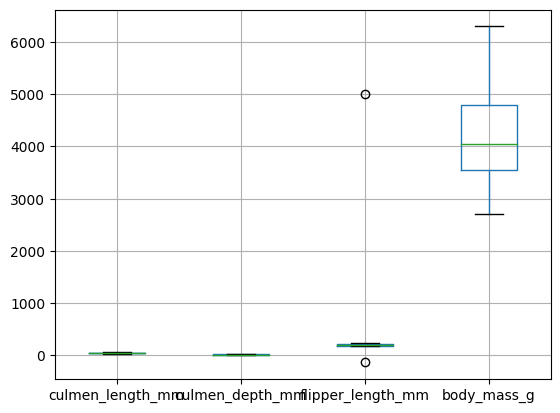

In [7]:
# check outliers
df.boxplot()
plt.show()

In [8]:
# get q1 and q3, and also iqr
q1 = df['flipper_length_mm'].quantile(0.25)
q3 = df['flipper_length_mm'].quantile(0.75)
iqr = q3 - q1

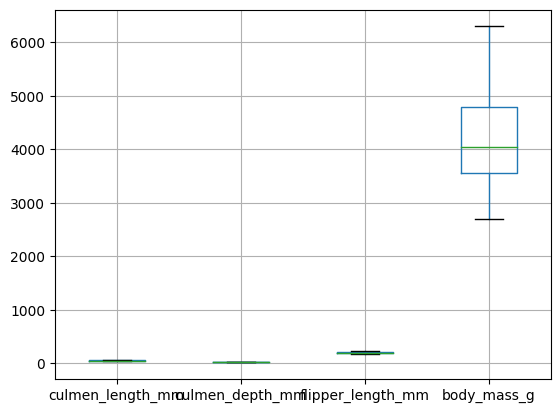

In [9]:
# Create a boolean mask to identify rows with outliers in 'Salary'
is_outlier = (df['flipper_length_mm'] < (q1 - 1.5 * iqr)) | (df['flipper_length_mm'] > (q3 + 1.5 * iqr))

# Drop rows with outliers (optional)
df_filtered = df[~is_outlier]

df_filtered.boxplot()
plt.show()


# **LETS GO MODELLING**

In [10]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [11]:
df_numerical = df.select_dtypes(include=[np.number])  # Select numerical columns
df_categorical = df.select_dtypes(include=[object])  # Select categorical columns (strings)

print('numerical data from this dataset is : \n', df_numerical)
print('categorical data from this dataset is : \n', df_categorical)

numerical data from this dataset is : 
      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[335 rows x 4 columns]
categorical data from this dataset is : 
         sex
0      MALE
1    FEMALE
2    F

In [12]:
# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))  # Adjust range if needed (e.g., (-1, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical))  # Transform the data

print(df_scaled.head())  # View the scaled DataFrame


          0         1         2         3
0  0.254545  0.666667  0.060990  0.291667
1  0.269091  0.511905  0.061964  0.305556
2  0.298182  0.583333  0.063718  0.152778
3  0.167273  0.738095  0.063328  0.208333
4  0.261818  0.892857  0.062744  0.263889


In [13]:
X = df_scaled
y = df['sex']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# naive bayes model
model = GaussianNB()

# train the model
model.fit(X_train, y_train)

# predict model with testing data
predicted_y = model.predict(X_test)

# Contoh: Hitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_y)
print('model accuration is :', accuracy)

model accuration is : 0.746268656716418


In [19]:
pd.set_option('display.max_rows', None)
from sklearn.metrics import confusion_matrix, classification_report
result = pd.DataFrame({'actual value': y_test, 'predicted value': predicted_y})
matrix = confusion_matrix(y_test, predicted_y)

print(classification_report(y_test, predicted_y))
print('confusion matrix of this analysis is: \n', matrix)
print('actual value vs predicted value: \n', result)

              precision    recall  f1-score   support

      FEMALE       0.68      0.94      0.79        34
        MALE       0.90      0.55      0.68        33

    accuracy                           0.75        67
   macro avg       0.79      0.74      0.73        67
weighted avg       0.79      0.75      0.74        67

confusion matrix of this analysis is: 
 [[32  2]
 [15 18]]
actual value vs predicted value: 
     actual value predicted value
29          MALE          FEMALE
114       FEMALE            MALE
81          MALE          FEMALE
201       FEMALE          FEMALE
62        FEMALE          FEMALE
261         MALE            MALE
187       FEMALE          FEMALE
186         MALE          FEMALE
280       FEMALE          FEMALE
203         MALE            MALE
77          MALE          FEMALE
13          MALE            MALE
277         MALE            MALE
323         MALE            MALE
177         MALE            MALE
207         MALE            MALE
80        FEMALE  